# Chapter 8: Making maps with Python

## Prerequisites

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
import rasterio.plot
import contextily as cx
import folium

In [ ]:
nz = gpd.read_file(r"F:\books\geocompy-main\data\nz.gpkg")
nz_height = gpd.read_file(r"F:\books\geocompy-main\data\nz_height.gpkg")
nz_elev = rasterio.open(r"F:\books\geocompy-main\data\nz_elev.tif")

## 8.1 Introduction

## 8.2 Static maps

### 8.2.1 Minimal examples

In [ ]:
nz.plot()

In [ ]:
rasterio.plot.show(nz_elev, cmap="terrain", title="NZ Elevation")

### 8.2.2 Styling

In [ ]:
nz.plot(color='lightgrey')
nz.plot(color='none', edgecolor='blue')
nz.plot(color='lightgrey', edgecolor='blue')

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
nz_height.plot(ax=ax, color='lightgrey', edgecolor='blue', markersize=100)

### 8.2.3 Symbology

In [ ]:
nz.plot(column='Median_income', legend=True)

In [ ]:
nz.plot(column='Median_income', legend=True, cmap='Reds')
nz.plot(column='Median_income', legend=True, cmap='Reds_r')
nz.plot(column='Median_income', legend=True, cmap='plasma')

In [ ]:
nz.plot(column='Island', legend=True, cmap='Set1')

In [ ]:
nz.plot(column='Island', legend=True, cmap='Set1', legend_kwds={'loc': 4})

In [ ]:
rasterio.plot.show(nz_elev, cmap="BrBG", title="NZ Elevation")
rasterio.plot.show(nz_elev, cmap="BrBG_r", title="NZ Elevation")
rasterio.plot.show(nz_elev, cmap="gist_earth", title="NZ Elevation")

In [ ]:
fig, ax = plt.subplots()
i = plt.imshow(nz_elev.read(1), cmap="BrBG")
rasterio.plot.show(nz_elev, ax=ax, cmap="BrBG", title="NZ Elevation")
plt.colorbar(i, ax=ax, shrink=0.5, label="Elevation (m)")

### 8.2.4 Labels

In [ ]:
nz1 = nz.loc[nz.Island == 'South']
print(nz1)
nz1.plot()

In [ ]:
fig, ax = plt.subplots()
nz1.plot(ax=ax, color='lightgrey', edgecolor='grey')
nz1.apply(
    lambda x: ax.annotate(
        x['Name'],
        xy=x.geometry.centroid.coords[0],
        ha='center'),
    axis=1
)

In [ ]:
ctr = nz[['Island', 'geometry']].dissolve(by='Island').reset_index()
ctr['geometry'] = ctr.centroid
ctr

In [ ]:
fig, ax = plt.subplots()
nz.plot(ax=ax, color='none', edgecolor='lightgrey')
ctr.apply(
    lambda x: ax.annotate(
        x['Island'],
        xy=x.geometry.coords[0],
        ha='center',
        weight='bold'),
    axis=1
)

In [ ]:
fig, ax = plt.subplots()
nz.plot(ax=ax, color='none', edgecolor='lightgrey')
ax.annotate('This is label 1', (1.8e6, 5.8e6), ha='center', weight='bold')
ax.annotate('This is label 2', (1.4e6, 5.2e6), ha='center', weight='bold')

### 8.2.5 Layers

In [ ]:
base = nz.plot(color='none')
nz_height.plot(ax=base, color='red')

In [ ]:
fig, ax = plt.subplots()
nz.plot(ax=ax, color='none')
nz_height.plot(ax=ax, color='red')

In [ ]:
# Raster + vector layer
fig, ax = plt.subplots(figsize=(5, 5))
rasterio.plot.show(nz_elev, ax=ax)
nz.to_crs(nz_elev.crs).plot(ax=ax, color='none', edgecolor='red')

In [ ]:
# Raster + computed vector layer
fig, ax = plt.subplots(figsize=(5, 5))
rasterio.plot.show(nz_elev, ax=ax)
gpd.GeoSeries(nz.union_all(), crs=nz.crs).to_crs(nz_elev.crs) \
    .buffer(22200) \
    .exterior \
    .plot(ax=ax, color='red')

In [ ]:
# Raster + two vector layers
fig, ax = plt.subplots(figsize=(5, 5))
rasterio.plot.show(nz_elev, ax=ax)
gpd.GeoSeries(nz.union_all(), crs=nz.crs) \
    .to_crs(nz_elev.crs) \
    .buffer(22200) \
    .exterior \
    .plot(ax=ax, color='red')
nz_height.to_crs(nz_elev.crs).plot(ax=ax, color='yellow');

### 8.2.6 Basemaps

In [43]:
nzw = nz[nz.Name == 'Nelson'].to_crs(epsg=3857)

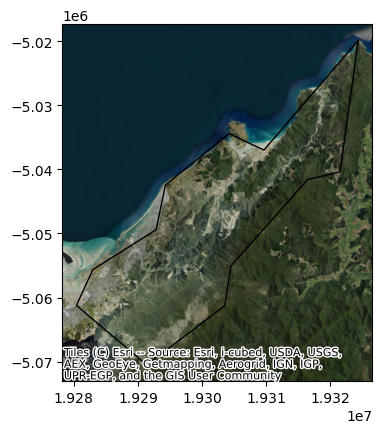

In [49]:
fig, ax = plt.subplots(figsize=(4, 10))
ax = nzw.plot(color='none', ax=ax)
cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery, zoom=12)

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
ax = nzw.plot(color='none', ax=ax)
cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery, zoom=12)

### 8.2.7 Faceted maps

In [ ]:
vars = ['Land_area', 'Population', 'Median_income', 'Sex_ratio']
nz[vars]

In [ ]:
fix, ax = plt.subplots(ncols=len(vars), figsize=(9, 2))
for i in range(len(vars)):
    nz.plot(column=vars[i], ax=ax[i], legend=True, cmap='plasma')
    ax[i].set_title(vars[i])

In [ ]:
fig, ax = plt.subplots(nrows=int(len(vars) / 2), ncols=2, figsize=(6, 6))
ax = ax.flatten()
for i in range(len(vars)):
    nz.plot(column=vars[i], ax=ax[i], legend=True)
    ax[i].set_title(vars[i])
    ax[i].set_axis_off()
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(nrows=int(len(vars) / 2), ncols=2, figsize=(6, 6))
nz.plot(ax=ax[0, 0], column=vars[0], legend=True)
ax[0, 0].set_title(vars[0])
nz.plot(ax=ax[0, 1], column=vars[1], legend=True)
ax[0, 1].set_title(vars[1])
nz.plot(ax=ax[1, 0], column=vars[2], legend=True)
ax[1, 0].set_title(vars[2])
nz.plot(ax=ax[1, 1], column=vars[3], legend=True)
ax[1, 1].set_title(vars[3])

### 8.2.8 Exporting

In [ ]:
base = nz.plot(color='none')
nz_height.plot(ax=base, color='red')
plt.savefig('plot_geopandas.jpg')

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
rasterio.plot.show(nz_elev, ax=ax)
nz.to_crs(nz_elev.crs).plot(ax=ax, color='none', edgecolor='red')
plt.savefig('plot_rasterio.jpg')

In [ ]:
fig, ax = plt.subplots(figsize=(5, 7))
rasterio.plot.show(nz_elev, ax=ax)
nz.to_crs(nz_elev.crs).plot(ax=ax, color='none', edgecolor='red')
plt.savefig('plot_rasterio2.svg', dpi=300)

## Interactive maps

### 8.3.1 Minimal example

In [ ]:
nz.explore()

In [ ]:
nz.explore(tiles='Esri WorldImagery')

### 8.3.2 Styling

In [ ]:
nz.explore(
    color = 'green',
    style_kwds = {'color': 'black', 'opacity': 0.5},
)

In [ ]:
nz_height.explore(
    color = 'green',
    style_kwds = {'color': 'black', 'opacity': 0.5, 'fillOpacity': 0.1},
    marker_kwds = {'radius': 20,}
)

In [ ]:
nz_height.explore(
    tiles='Esri WorldImagery',
    marker_type='marker'
)

### 8.3.3 Layers

In [ ]:
m = nz.explore(
    tiles='Esri WorldImagery',
    color = 'green',
)
nz_height.explore(
    m=m,
    color = 'green',
    style_kwds = {'color': 'black', 'opacity': 0.5, 'fillOpacity': 0.1},
    marker_kwds = {'radius': 1}
)


In [ ]:
m = nz.explore(
    tiles='Esri WorldImagery',
    name='Polgyons (adm. areas)',
    style_kwds = {'color': 'green', 'opacity': 0.1, 'fillOpacity': 0.1},
    )
nz_height.explore(
    m=m,
    name='Points (height)',
    color = 'red',
    marker_kwds = {'radius': 1}
)
folium.LayerControl().add_to(m)
m

### 8.3.4 Symbology

In [ ]:
nz.explore(
    tiles='Esri WorldImagery',
    column='Median_income',
    cmap='plasma',
    legend=True,
    tooltip=['Name', 'Median_income'],
    style_kwds={'fillOpacity': 0.5}
)

In [ ]:
nz.explore(
    tiles='Esri WorldImagery',
    column='Median_income',
    cmap='Reds',
    legend=True,
    tooltip=['Name', 'Median_income'],
    style_kwds={'fillOpacity': 0.5}
)

### 8.3.5 Basemaps

In [ ]:
nz.explore(
    tiles='Carto'
)

### 8.3.6 Exporting

In [ ]:
m = nz.explore(
    tiles='Esri WorldImagery',
    name='Polgyons (adm. areas)',
    column='Median_income',
    cmap='Reds',
    legend=True,
    tooltip=['Name', 'Median_income'],
    style_kwds={'fillOpacity': 0.5}
)
nz_height.explore(
    m=m,
    name='Points (elevation)',
    color = 'red',
    marker_kwds = {'radius': 5}
)
folium.LayerControl(collapsed=False).add_to(m)

m